<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q4_china_gdp_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls


sample_data  Year,GDP.txt


Fitted Parameters:
 a (growth rate): 0.1628
 b (midpoint): 2026.89
 c (max GDP): 10000.13

=== Model Performance ===
R² Score: 0.9926
MAE: 17.0914
MSE: 462.5362


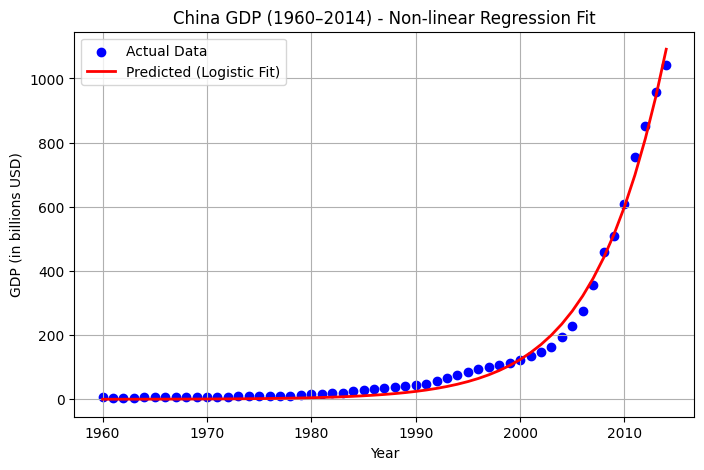

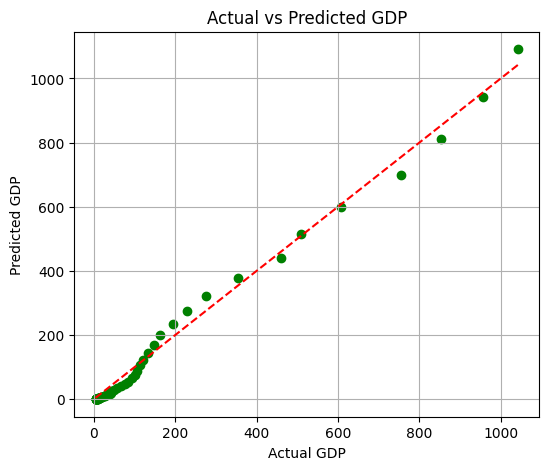

In [3]:
# Non-Linear Regression (Logistic Model) to Predict China's GDP
# Dataset: china_gdp.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------- Load Dataset ----------------
data = pd.read_csv("Year,GDP.txt")
data = data.rename(columns={"Year": "Year", "GDP": "GDP"}) # Ensure column names are correct
x_data = data["Year"].values
y_data = data["GDP"].values

# ---------------- Define Logistic Function ----------------
def logistic(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# ---------------- Fit Non-linear Model ----------------
popt, pcov = curve_fit(logistic, x_data, y_data, p0=[0.03, 1990, 1500])

# Model Parameters
a, b, c = popt
print(f"Fitted Parameters:\n a (growth rate): {a:.4f}\n b (midpoint): {b:.2f}\n c (max GDP): {c:.2f}")

# Predictions
y_pred = logistic(x_data, *popt)

# ---------------- Evaluate Model ----------------
r2 = r2_score(y_data, y_pred)
mae = mean_absolute_error(y_data, y_pred)
mse = mean_squared_error(y_data, y_pred)

print("\n=== Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

# ---------------- Plot Non-linear Fit ----------------
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', linewidth=2, label='Predicted (Logistic Fit)')
plt.title("China GDP (1960–2014) - Non-linear Regression Fit")
plt.xlabel("Year")
plt.ylabel("GDP (in billions USD)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------- Actual vs Predicted Comparison ----------------
plt.figure(figsize=(6,5))
plt.scatter(y_data, y_pred, color='green')
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--')
plt.title("Actual vs Predicted GDP")
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.grid(True)
plt.show()